In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## By using social.csv



In [87]:
df=pd.read_csv("social.csv")
df.head()

,user_id,timestamp,likes,comments,follows,timespend,shares
0,46790,1/1/2023 12:00,10,5,2,1.50,15
1,46791,1/1/2023 12:15,5,2,1,0.75,35
2,46792,1/1/2023 12:30,15,8,3,2.00,8
3,46793,1/1/2023 13:00,8,4,2,1.20,42
4,46794,1/1/2023 13:30,12,6,3,1.80,20


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    47 non-null     int64  
 1   timestamp  47 non-null     object 
 2   likes      47 non-null     int64  
 3   comments   47 non-null     int64  
 4   follows    47 non-null     int64  
 5   timespend  47 non-null     float64
 6   shares     47 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.7+ KB


##  Each row represents a unique entry with a user_id, timestamp, likes, comments, follows, and timespend(hrs).
## The same user_id can appear multiple times with different values. The timestamp is in the format YYYY-MM-DD HH:MM:SS.
## The likes, comments, follows,shares are the number of likes, comments,follows and shares respectively.
## The timespend(hrs) is the time spent by the user on the platform in hours.

In [89]:
df.isnull().sum()

user_id      0
timestamp    0
likes        0
comments     0
follows      0
timespend    0
shares       0
dtype: int64

In [90]:
df.describe()

,user_id,likes,comments,follows,timespend,shares
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,46797.680851,13.042553,6.468085,2.957447,1.743617,24.872340
std,5.069544,6.399584,3.195452,1.627982,0.703456,14.755422
min,46790.000000,5.000000,2.000000,1.000000,0.750000,1.000000
25%,46793.500000,8.000000,4.000000,2.000000,1.200000,12.500000
50%,46797.000000,12.000000,6.000000,3.000000,1.800000,24.000000
75%,46801.500000,18.000000,9.000000,4.000000,2.200000,37.500000
max,46807.000000,25.000000,12.000000,6.000000,3.000000,50.000000


## Q1

## Calculate the total number of actions performed by each user

In [91]:
new_df=df.groupby("user_id")[["likes","comments","follows","shares"]].sum()
new_df

,likes,comments,follows,shares
user_id,,,,
46790,30,15,6,87
46791,21,10,5,82
46792,45,24,9,52
46793,18,8,4,90
46794,36,18,9,77
46795,60,30,15,66
46796,18,9,3,115
46797,54,27,12,59
46798,75,36,18,86


In [92]:
new_df.groupby("user_id").get_group(46797)

,likes,comments,follows,shares
user_id,,,,
46797,54,27,12,59


In [93]:
new_df["total_actions"]=new_df["likes"]+new_df["comments"]+new_df["follows"]+new_df["shares"]

In [94]:
new_df

,likes,comments,follows,shares,total_actions
user_id,,,,,
46790,30,15,6,87,138
46791,21,10,5,82,118
46792,45,24,9,52,130
46793,18,8,4,90,120
46794,36,18,9,77,140
46795,60,30,15,66,171
46796,18,9,3,115,145
46797,54,27,12,59,152
46798,75,36,18,86,215


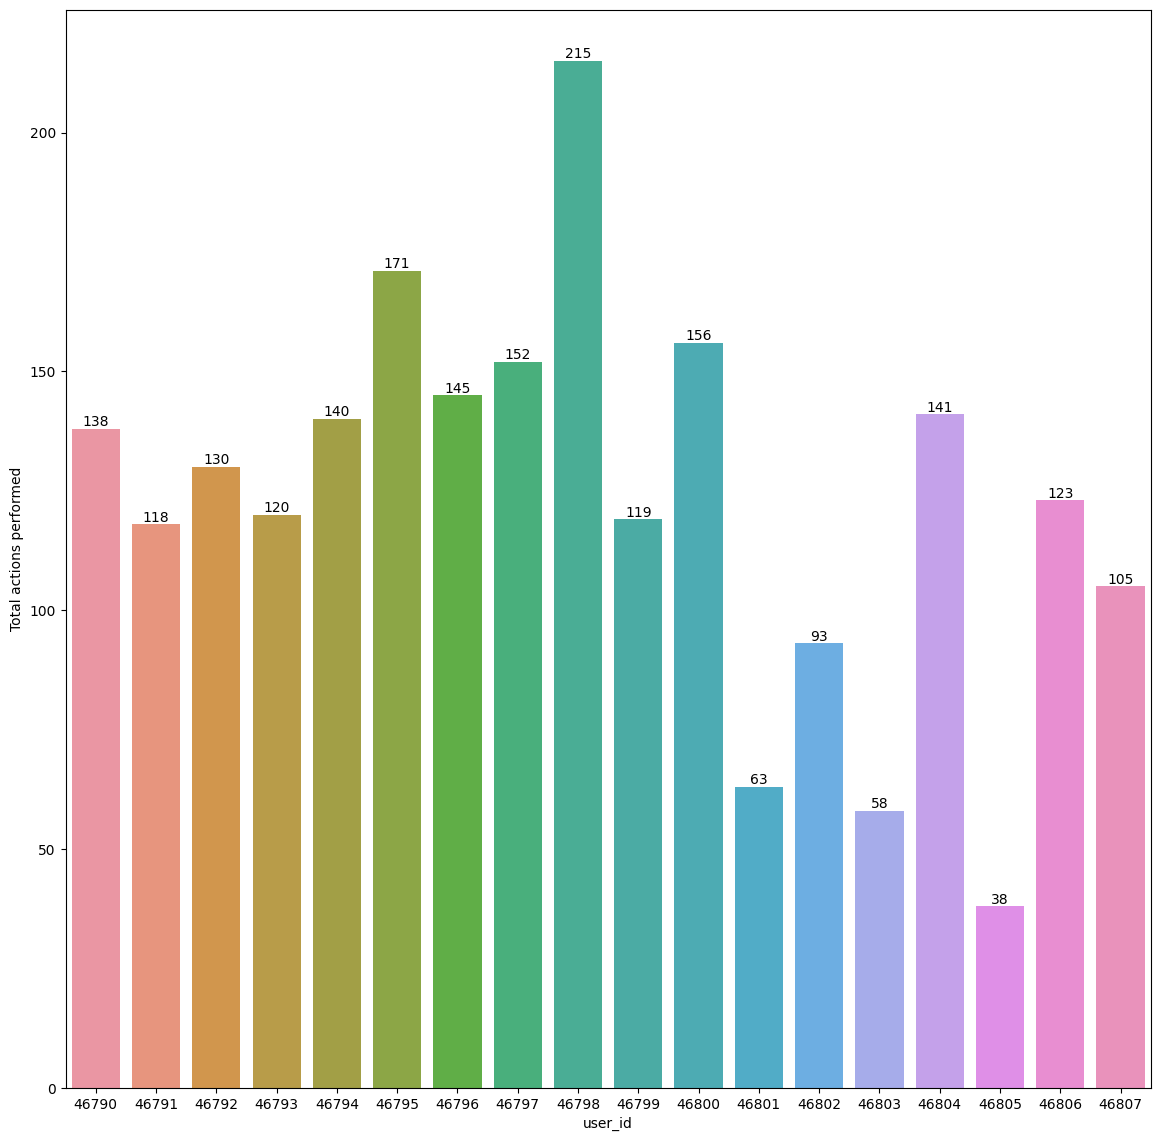

In [95]:
plt.figure(figsize=(14,14))
ta=sns.barplot(x=new_df.index,y=new_df["total_actions"],data=new_df)
for k in ta.containers:
  ta.bar_label(k)
plt.ylabel("Total actions performed")
plt.show()

## Q2

## Determine the most common action performed by users

In [96]:
df.sum(numeric_only=True)

user_id      2199491.00
likes            613.00
comments         304.00
follows          139.00
timespend         81.95
shares          1169.00
dtype: float64

In [97]:
no_of_likes=df.likes.sum()
no_of_comments=df.comments.sum()
no_of_follows=df.follows.sum()
no_of_shares=df.shares.sum()

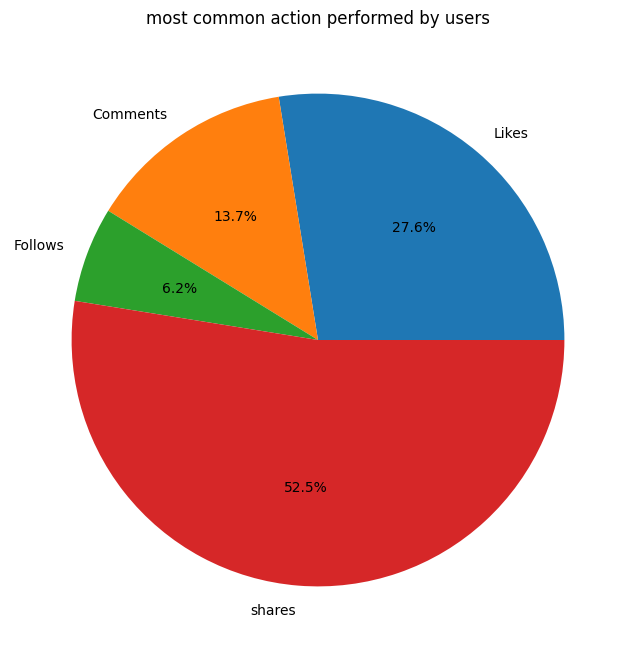

In [98]:
plt.figure(figsize=(8,8))
plt.title("most common action performed by users")
plt.pie([no_of_likes,no_of_comments,no_of_follows,no_of_shares],labels=["Likes","Comments","Follows","shares"], autopct="%1.1f%%")
plt.show()

### As in above pie chart we can see that the most common action performed by users is Share.

## Q3

## Identify the user who has the highest engagement(sum of all actions)

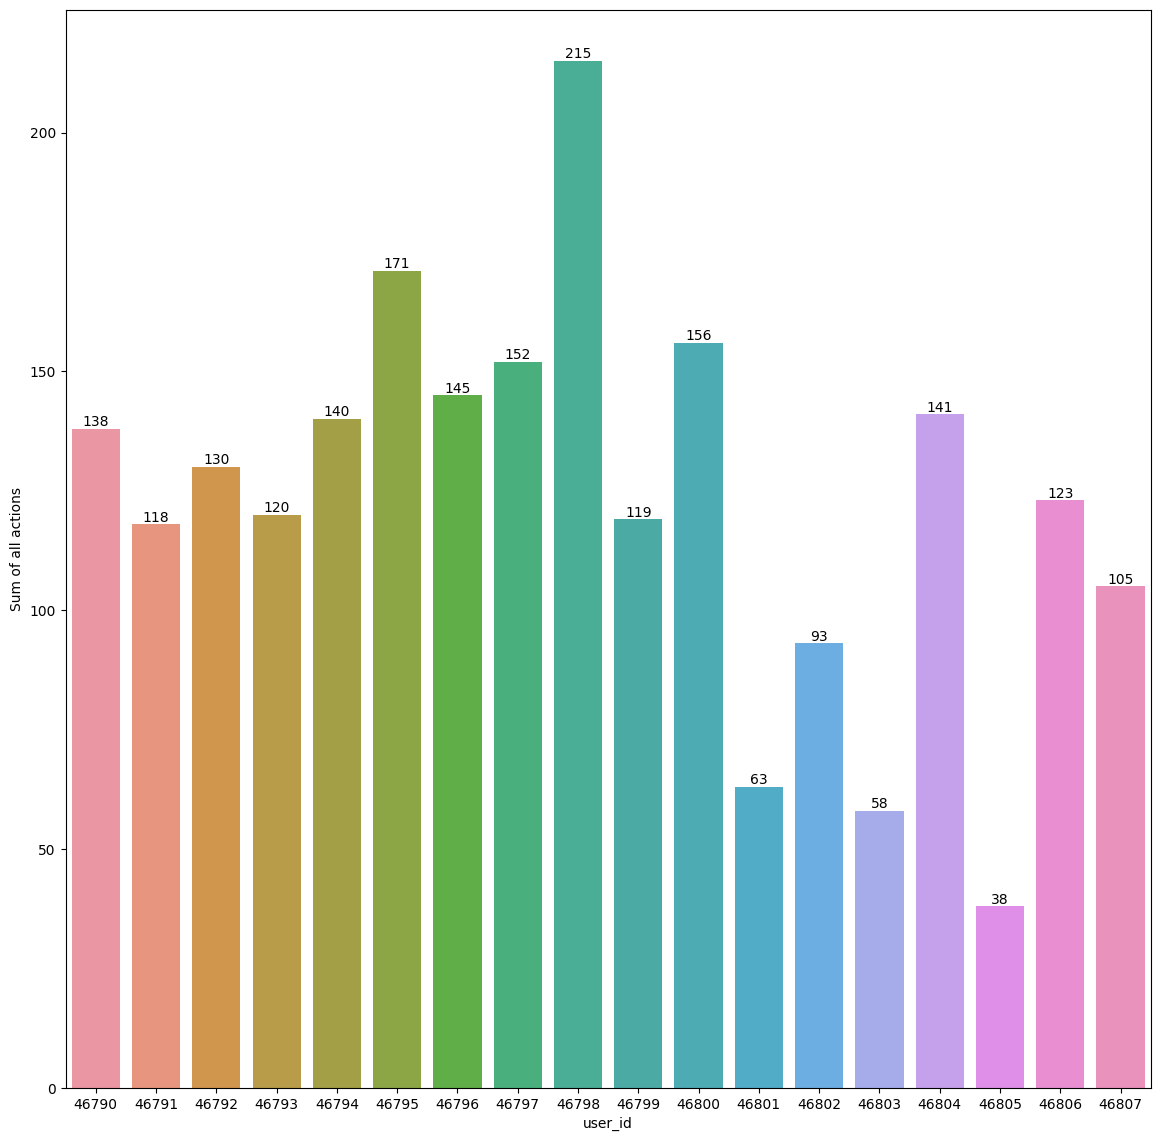

In [111]:
plt.figure(figsize=(14,14))
ta=sns.barplot(x=new_df.index,y=new_df["total_actions"],data=new_df)
for k in ta.containers:
  ta.bar_label(k)
plt.ylabel("Sum of all actions")
plt.show()

In [99]:
new_df[new_df["total_actions"]==new_df["total_actions"].max() ].index[0]

46798

## The user having user_id 46798 has the highest engagement(sum of all actions)

## Q4

## Provide statistics on user activity over time (e.g., hourly, daily, or monthly trends).

In [100]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df[df["user_id"]==46790]

,user_id,timestamp,likes,comments,follows,timespend,shares
0,46790,2023-01-01 12:00:00,10,5,2,1.5,15
18,46790,2023-01-02 00:00:00,10,5,2,1.5,49
36,46790,2023-01-02 18:00:00,10,5,2,1.5,23


In [101]:
df.dtypes

user_id               int64
timestamp    datetime64[ns]
likes                 int64
comments              int64
follows               int64
timespend           float64
shares                int64
dtype: object

In [102]:
hourly_activity = df.groupby(df['user_id'])["timestamp"].unique()
hourly_activity

user_id
46790    [2023-01-01T12:00:00.000000000, 2023-01-02T00:...
46791    [2023-01-01T12:15:00.000000000, 2023-01-02T01:...
46792    [2023-01-01T12:30:00.000000000, 2023-01-02T02:...
46793    [2023-01-01T13:00:00.000000000, 2023-01-02T03:...
46794    [2023-01-01T13:30:00.000000000, 2023-01-02T04:...
46795    [2023-01-01T14:00:00.000000000, 2023-01-02T05:...
46796    [2023-01-01T14:30:00.000000000, 2023-01-02T06:...
46797    [2023-01-01T15:00:00.000000000, 2023-01-02T07:...
46798    [2023-01-01T15:30:00.000000000, 2023-01-02T08:...
46799    [2023-01-01T16:00:00.000000000, 2023-01-02T09:...
46800    [2023-01-01T16:30:00.000000000, 2023-01-02T10:...
46801    [2023-01-01T17:00:00.000000000, 2023-01-02T11:...
46802    [2023-01-01T18:00:00.000000000, 2023-01-02T12:...
46803    [2023-01-01T19:00:00.000000000, 2023-01-02T13:...
46804    [2023-01-01T20:00:00.000000000, 2023-01-02T14:...
46805    [2023-01-01T21:00:00.000000000, 2023-01-02T15:...
46806    [2023-01-01T22:00:00.000000000, 2023-01

In [103]:
df.groupby(df['timestamp'].dt.hour)['user_id'].unique()

timestamp
0                   [46790, 46796]
1                   [46791, 46797]
2                   [46792, 46798]
3                   [46793, 46799]
4                   [46794, 46800]
5                          [46795]
6                          [46796]
7                          [46797]
8                          [46798]
9                          [46799]
10                         [46800]
11                         [46801]
12    [46790, 46791, 46792, 46802]
13           [46793, 46794, 46803]
14           [46795, 46796, 46804]
15           [46797, 46798, 46805]
16           [46799, 46800, 46806]
17                  [46801, 46807]
18                  [46802, 46790]
19                  [46803, 46791]
20                  [46804, 46792]
21                  [46805, 46793]
22                  [46806, 46794]
23                  [46807, 46795]
Name: user_id, dtype: object

In [104]:
hourly_activity = df.groupby(df['timestamp'].dt.hour)['user_id'].count()
hourly_activity

timestamp
0     2
1     2
2     2
3     2
4     2
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    4
13    3
14    3
15    3
16    3
17    2
18    2
19    2
20    2
21    2
22    2
23    2
Name: user_id, dtype: int64

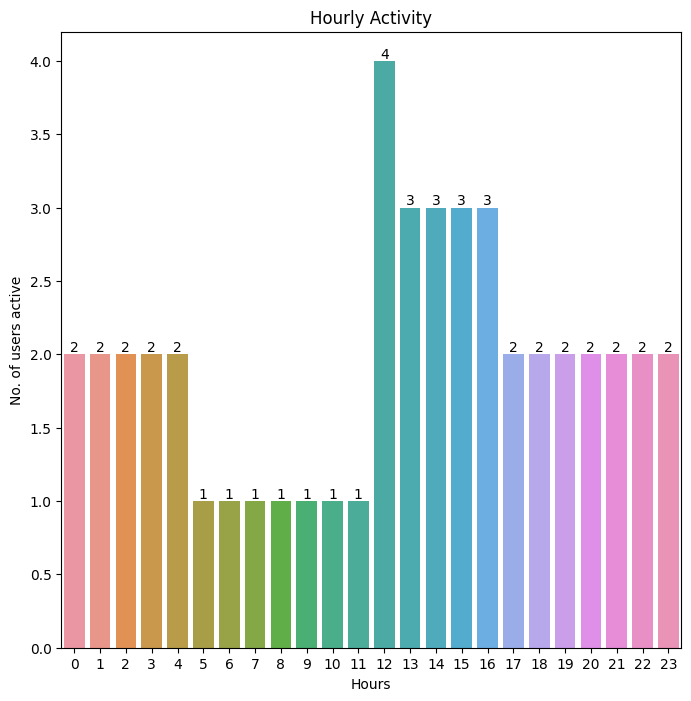

In [113]:
plt.figure(figsize=(8,8))
plt.title("Hourly Activity")
bp=sns.barplot(x=hourly_activity.index,y=hourly_activity)
plt.ylabel("No. of users active")
plt.xlabel("Hours")
for i in bp.containers:
  bp.bar_label(i)
plt.show()

In [106]:
daily_activity=df.groupby(df['timestamp'].dt.date)["user_id"].count()
daily_activity

timestamp
2023-01-01    18
2023-01-02    24
2023-01-03     5
Name: user_id, dtype: int64

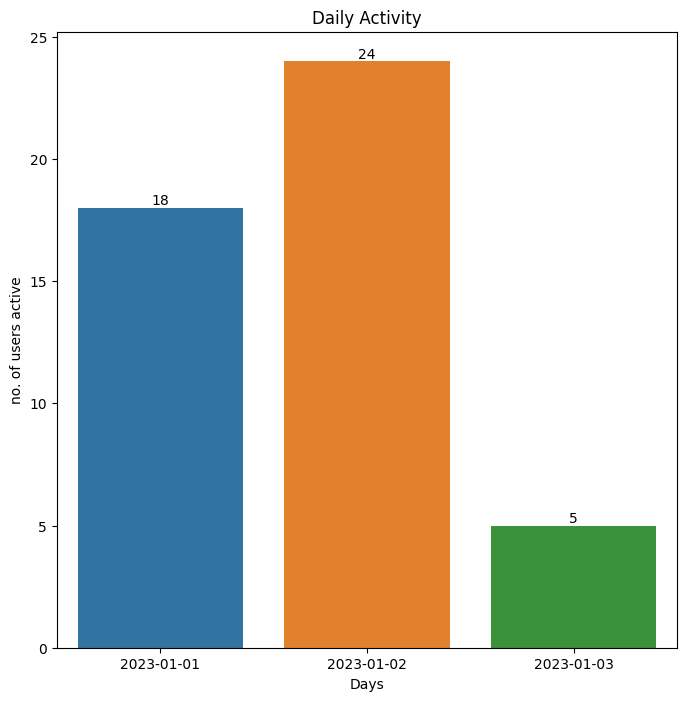

In [112]:
plt.figure(figsize=(8,8))
plt.title("Daily Activity")
da=sns.barplot(x=daily_activity.index,y=daily_activity)
plt.ylabel("no. of users active")
plt.xlabel("Days")
for i in da.containers:
  da.bar_label(i)
plt.show()

In [108]:
monthly_activity=df.groupby(df["timestamp"].dt.month)["user_id"].count()
monthly_activity

timestamp
1    47
Name: user_id, dtype: int64

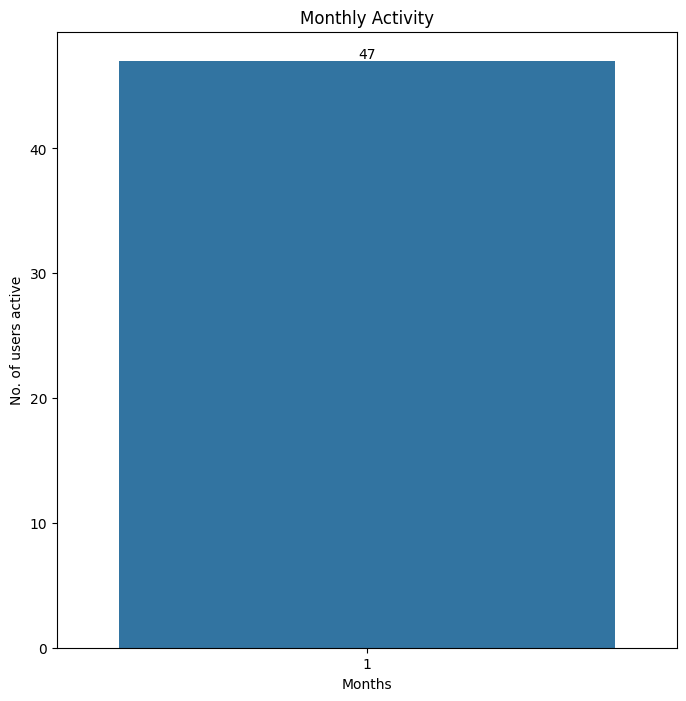

In [114]:
plt.figure(figsize=(8,8))
plt.title("Monthly Activity")
ma=sns.barplot(x=monthly_activity.index,y=monthly_activity)
for i in ma.containers:
  ma.bar_label(i)
  break
plt.xlabel("Months")
plt.ylabel("No. of users active")
plt.show()